In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

# Khởi tạo trình duyệt Chrome
driver = webdriver.Chrome()

# Mở trang web Tradingview
driver.get("https://www.tradingview.com/markets/stocks-usa/market-movers-all-stocks/")

# Số lần nhấn nút "Load More" tối đa (hoặc bạn có thể sử dụng điều kiện khác)
max_loads = 10  # Thay đổi giá trị này nếu cần

loads = 0
data_rows = []

while loads < max_loads:
    try:
        load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".loadButton-SFwfC2e0")))
        load_more_button.click()
        loads += 1
    except:
        break

# Chờ cho dữ liệu được tải đầy đủ
WebDriverWait(driver, 10).until(EC.invisibility_of_element_located((By.CSS_SELECTOR, ".loadingContent-2CAlGV8F")))

# Tạo biến soup1 từ trang web đã tải
soup1 = BeautifulSoup(driver.page_source, 'html.parser')

# Trích xuất dữ liệu và thêm vào danh sách dòng dữ liệu
row_data = soup1.find_all('tr', class_='row-RdUXZpkv')
for row in row_data:
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    if len(individual_row) == 11:  # Kiểm tra xem có đủ dữ liệu không
        data_rows.append(individual_row)

# Tạo DataFrame từ danh sách dòng dữ liệu
data_for_all = pd.DataFrame(data_rows, columns=["Stock", "Price", "Change", "Volume", "Market Cap", "PE Ratio", "EPS", "Dividend", "Yield", "Sector", "Recommendation"])

# In ra DataFrame
print(data_for_all)

# Đóng trình duyệt sau khi hoàn thành
driver.quit()

                                       Stock       Price  Change    Volume  \
0               AAgilent Technologies, Inc.D  115.91 USD   0.90%     6.89M   
1                       AAAlcoa CorporationD   28.85 USD  −4.44%    8.716M   
2           AACAres Acquisition CorporationD   10.71 USD  −0.09%   19.471K   
3            AACIArmada Acquisition Corp. ID   10.75 USD   0.00%       211   
4       AACTAres Acquisition Corporation IID   10.25 USD   0.10%    14.04K   
..                                       ...         ...     ...       ...   
995         CLVRClever Leaves Holdings Inc.D    3.78 USD   0.53%    82.16K   
996                       CLVTClarivate PlcD    7.35 USD   1.24%    6.997M   
997         CLWClearwater Paper CorporationD   35.14 USD  −0.87%  317.045K   
998  CLWTEuro Tech Holdings Company LimitedD    1.50 USD   1.35%    7.671K   
999                 CLXClorox Company (The)D  146.20 USD  −2.17%    1.704M   

       Market Cap PE Ratio        EPS   Dividend  Yield  \
0   

In [2]:
data_for_all

,Stock,Price,Change,Volume,Market Cap,PE Ratio,EPS,Dividend,Yield,Sector,Recommendation
0,"AAgilent Technologies, Inc.D",115.91 USD,0.90%,6.89M,33.914B USD,30.40,3.81 USD,−13.21%,0.76%,Health Technology,Buy
1,AAAlcoa CorporationD,28.85 USD,−4.44%,8.716M,5.148B USD,—,−8.15 USD,−259.86%,1.39%,Non-Energy Minerals,Neutral
2,AACAres Acquisition CorporationD,10.71 USD,−0.09%,19.471K,756.172M USD,—,−0.09 USD,−134.01%,0.00%,Finance,—
3,AACIArmada Acquisition Corp. ID,10.75 USD,0.00%,211,99.097M USD,—,−0.03 USD,86.19%,0.00%,Finance,—
4,AACTAres Acquisition Corporation IID,10.25 USD,0.10%,14.04K,512.5M USD,—,—,—,0.00%,Finance,—
...,...,...,...,...,...,...,...,...,...,...,...
995,CLVRClever Leaves Holdings Inc.D,3.78 USD,0.53%,82.16K,5.762M USD,—,−1.31 USD,95.10%,0.00%,Health Technology,Neutral
996,CLVTClarivate PlcD,7.35 USD,1.24%,6.997M,4.97B USD,—,−6.41 USD,−1574.54%,0.00%,Commercial Services,Buy
997,CLWClearwater Paper CorporationD,35.14 USD,−0.87%,317.045K,587.28M USD,8.77,4.01 USD,60.30%,0.00%,Process Industries,Strong Buy
998,CLWTEuro Tech Holdings Company LimitedD,1.50 USD,1.35%,7.671K,11.585M USD,31.45,0.05 USD,−52.35%,0.00%,Electronic Technology,—


<ipython-input-5-143d9eef330b>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  prices = prices.str.replace(' USD', '').str.replace('$', '').astype(float)


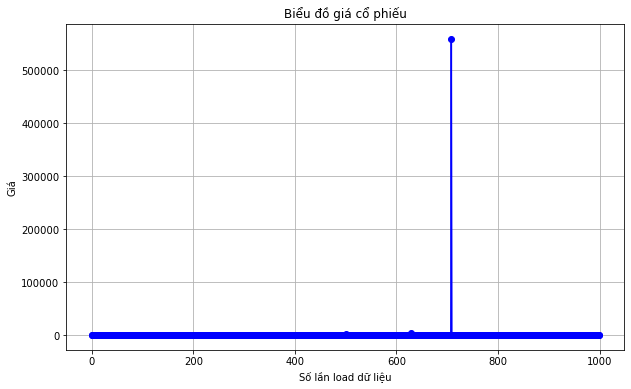

In [5]:
import matplotlib.pyplot as plt
# Lấy dữ liệu từ cột "Price"
prices = data_for_all["Price"]

# Xử lý giá trị để chỉ lấy số và dấu thập phân, loại bỏ ký tự "USD"
prices = prices.str.replace(' USD', '').str.replace('$', '').astype(float)

# Vẽ biểu đồ cho cột "Price"
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.plot(prices, marker='o', linestyle='-', color='b')  # Vẽ biểu đồ đường
plt.title('Biểu đồ giá cổ phiếu')  # Tiêu đề biểu đồ
plt.xlabel('Số lần load dữ liệu')  # Nhãn x cho trục hoành
plt.ylabel('Giá')  # Nhãn y cho trục tung
plt.grid(True)  # Hiển thị lưới

# Hiển thị biểu đồ
plt.show()








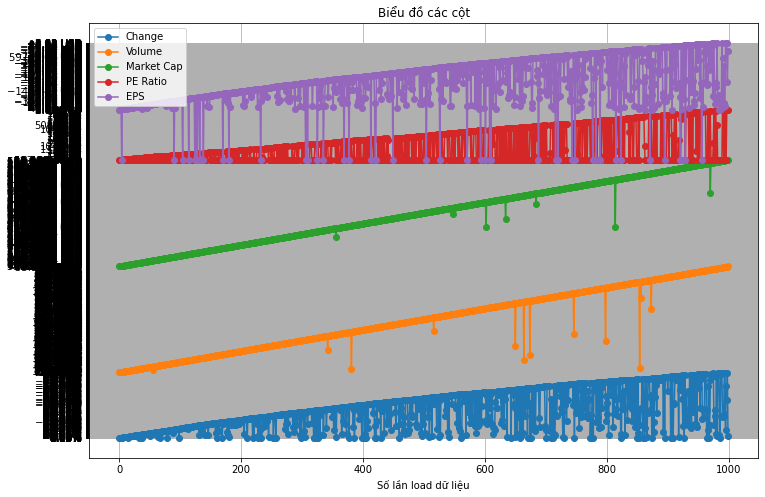

In [6]:
# Lấy dữ liệu từ 5 cột tiếp theo
columns_to_plot = ["Change", "Volume", "Market Cap", "PE Ratio", "EPS"]

# Vẽ biểu đồ cho từng cột
plt.figure(figsize=(12, 8))  # Kích thước biểu đồ

for column in columns_to_plot:
    plt.plot(data_for_all[column], marker='o', linestyle='-', label=column)

plt.title('Biểu đồ các cột')  # Tiêu đề biểu đồ
plt.xlabel('Số lần load dữ liệu')  # Nhãn x cho trục hoành
plt.grid(True)  # Hiển thị lưới
plt.legend()  # Hiển thị chú thích

# Hiển thị biểu đồ
plt.show()

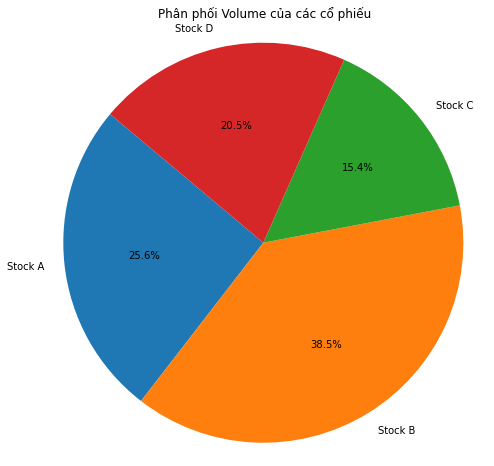

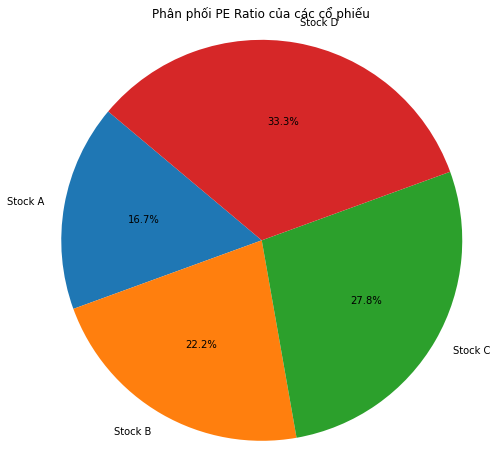

In [15]:
import matplotlib.pyplot as plt

# Dữ liệu mẫu (ảo tưởng)
volume_data = [500000, 750000, 300000, 400000]
pe_ratio_data = [15, 20, 25, 30]
stock_names = ["Stock A", "Stock B", "Stock C", "Stock D"]

# Tạo biểu đồ pie cho dữ liệu "Volume"
plt.figure(figsize=(8, 8))
plt.pie(volume_data, labels=stock_names, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Volume của các cổ phiếu')
plt.axis('equal')  # Để biểu đồ tròn

plt.show()

# Tạo biểu đồ pie cho dữ liệu "PE Ratio"
plt.figure(figsize=(8, 8))
plt.pie(pe_ratio_data, labels=stock_names, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối PE Ratio của các cổ phiếu')
plt.axis('equal')  # Để biểu đồ tròn

plt.show()